# Telecom Churn Prediction

## 1 Problem Statement

A leading telecom firm from Southeast Asia has collected customer-level data pertaining to the use of its services for a span of four consecutive months encoded as 6, 7, 8 and 9. The goal of the analytics project is to
- predict customer churn in the 9th month using data from the preceding 3 months, and
- identify the important predictors of customer churn.

The findings will be used to develop strategies to manage customer churn.

## 2 Approach to Analysis

Analysis is performed as per the following steps:

**Data Cleaning, Feature Engineering & EDA**
- Data Understanding & Cleaning
- Feature Engineering
- Exploratory Data Analysis
- Data Preparation

**Prediction**
- Decision Tree Classifier
- Random Forest Classifier
- XGBoost Classifier
- Model Selection

**Inference**
- Model Building
- Model Evaluation
- Model Interpretation

**Strategies to Manage Churn**

## 3 Data Cleaning, Feature Engineering & EDA

### 3.1 Data Loading & Inspection

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
# Loading the data and viewing
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Inspecting the shape of the data
df.shape

(99999, 226)

In [4]:
# Inspecting data types and other meta-data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

### 3.2 Data Cleaning

#### 3.2.1 Checking and fixing header and footer rows

In [5]:
# Checking the header row
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# Checking the footer row
df.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

Since there are no anomalies in the header and footer rows, no changes are required.

#### 3.2.2 Checking and fixing duplicates

In [7]:
df[df.duplicated()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


Since there are no duplicate rows, no changes are required.

#### 3.2.3 Treating missing values

In [8]:
# Calculating the percentage of missing values in each column
null_per = df.isnull().sum()/len(df)*100
null_per.sort_values(ascending=False)

arpu_3g_6            74.846748
night_pck_user_6     74.846748
total_rech_data_6    74.846748
arpu_2g_6            74.846748
max_rech_data_6      74.846748
                       ...    
max_rech_amt_7        0.000000
max_rech_amt_6        0.000000
total_rech_amt_9      0.000000
total_rech_amt_8      0.000000
sep_vbc_3g            0.000000
Length: 226, dtype: float64

In [9]:
# Dropping columns with more than 50% missing values because we cannot reliably impute such a large number
cols_to_drop = null_per[null_per>50].index
cols_to_drop

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [10]:
df = df.drop(columns=cols_to_drop)
df.shape

(99999, 186)

In [11]:
# Calculating the percentage of missing values in each column again
null_per = df.isnull().sum()/len(df)*100
null_per.sort_values(ascending=False)

loc_og_t2m_mou_9      7.745077
loc_ic_t2m_mou_9      7.745077
offnet_mou_9          7.745077
std_ic_t2f_mou_9      7.745077
roam_ic_mou_9         7.745077
                        ...   
max_rech_amt_7        0.000000
max_rech_amt_8        0.000000
max_rech_amt_9        0.000000
last_day_rch_amt_6    0.000000
sep_vbc_3g            0.000000
Length: 186, dtype: float64

The remaining missing values will be treated after a more thorough analysis of the data because there may be meaningful missing values.

#### 3.2.4 Validating data

In [12]:
# Printing descriptive statistics of numeric variables to identify anomalies
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.0

In [13]:
# Dropping mobile_number, which is an identifier, and columns with only 1 value because they do not add information to the model
df = df.drop(columns=['mobile_number','circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'])

In [14]:
# Creating lists of numeric and categorical variables
num_vars = list(df.select_dtypes(include=['number']).columns)
cat_vars = list(df.select_dtypes(include=['object','category']).columns)

In [15]:
# Printing unique values of categorical variables to identify anomalies
for x in cat_vars:
    print(df[x].value_counts(normalize=True,dropna=False)*100,end='\n\n')

6/30/2014    100.0
Name: last_date_of_month_6, dtype: float64

7/31/2014    99.398994
NaN           0.601006
Name: last_date_of_month_7, dtype: float64

8/31/2014    98.899989
NaN           1.100011
Name: last_date_of_month_8, dtype: float64

9/30/2014    98.340983
NaN           1.659017
Name: last_date_of_month_9, dtype: float64

6/30/2014    16.960170
6/29/2014    12.918129
6/27/2014    11.169112
6/28/2014     9.491095
6/26/2014     5.530055
6/25/2014     4.896049
6/17/2014     4.145041
6/24/2014     4.129041
6/14/2014     3.845038
6/21/2014     3.747037
6/23/2014     2.908029
6/18/2014     2.747027
6/12/2014     2.511025
6/22/2014     2.344023
6/13/2014     2.147021
6/19/2014     2.009020
6/20/2014     1.803018
NaN           1.607016
6/16/2014     1.126011
6/15/2014     0.873009
6/11/2014     0.579006
6/8/2014      0.520005
6/5/2014      0.327003
6/7/2014      0.322003
6/10/2014     0.283003
6/3/2014      0.233002
6/1/2014      0.218002
6/9/2014      0.199002
6/6/2014      0.173002


In [16]:
# Dropping 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8' and 'last_date_of_month_9' because they do not add information to th model
df = df.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'])

In [17]:
# Printing all columns in the DataFrame after sorting to identify invalid data
for x in df.columns:
    print(df[x].sort_values(),end='\n\n')

84160    -2258.709
2777     -2041.228
12485     -810.661
91734     -383.565
90490     -209.465
           ...    
33019    10955.066
67717    11261.349
97850    11505.508
51314    15487.684
38610    27731.088
Name: arpu_6, Length: 99999, dtype: float64

588      -2014.045
66516    -1289.715
78929    -1084.211
34754    -1077.191
27209     -897.035
           ...    
33019     8609.460
61944    13224.119
51314    14624.089
67717    16820.145
38610    35145.834
Name: arpu_7, Length: 99999, dtype: float64

2777      -945.808
36926     -491.545
15132     -345.129
30382     -197.957
32079     -155.236
           ...    
67717    12533.285
33019    13505.996
51314    16040.503
93779    19295.904
38610    33543.624
Name: arpu_8, Length: 99999, dtype: float64

31419    -1899.505
57290    -1474.195
50760    -1254.495
29193     -936.095
90149     -814.095
           ...    
55248    10075.019
33019    10787.982
67717    14997.307
93779    15459.993
38610    38805.617
Name: arpu_9, Length: 99999, 

1        0.0
51543    0.0
51548    0.0
51549    0.0
51550    0.0
        ... 
99867    NaN
99871    NaN
99914    NaN
99978    NaN
99993    NaN
Name: std_og_t2m_mou_6, Length: 99999, dtype: float64

99997    0.0
27165    0.0
27166    0.0
61388    0.0
61387    0.0
        ... 
99948    NaN
99978    NaN
99993    NaN
99996    NaN
99998    NaN
Name: std_og_t2m_mou_7, Length: 99999, dtype: float64

0        0.0
52203    0.0
52206    0.0
52209    0.0
52215    0.0
        ... 
99978    NaN
99983    NaN
99993    NaN
99996    NaN
99998    NaN
Name: std_og_t2m_mou_8, Length: 99999, dtype: float64

1        0.0
52821    0.0
52822    0.0
52823    0.0
52824    0.0
        ... 
99978    NaN
99983    NaN
99993    NaN
99996    NaN
99998    NaN
Name: std_og_t2m_mou_9, Length: 99999, dtype: float64

1        0.0
64479    0.0
64478    0.0
64477    0.0
64476    0.0
        ... 
99867    NaN
99871    NaN
99914    NaN
99978    NaN
99993    NaN
Name: std_og_t2f_mou_6, Length: 99999, dtype: float64

1        0

1        0.0
57402    0.0
57403    0.0
57404    0.0
57406    0.0
        ... 
99867    NaN
99871    NaN
99914    NaN
99978    NaN
99993    NaN
Name: std_ic_t2t_mou_6, Length: 99999, dtype: float64

1        0.0
57372    0.0
57373    0.0
57375    0.0
57378    0.0
        ... 
99948    NaN
99978    NaN
99993    NaN
99996    NaN
99998    NaN
Name: std_ic_t2t_mou_7, Length: 99999, dtype: float64

0        0.0
57325    0.0
57326    0.0
57327    0.0
57329    0.0
        ... 
99978    NaN
99983    NaN
99993    NaN
99996    NaN
99998    NaN
Name: std_ic_t2t_mou_8, Length: 99999, dtype: float64

1        0.0
57898    0.0
57899    0.0
57900    0.0
57902    0.0
        ... 
99978    NaN
99983    NaN
99993    NaN
99996    NaN
99998    NaN
Name: std_ic_t2t_mou_9, Length: 99999, dtype: float64

49993    0.0
34707    0.0
76192    0.0
34711    0.0
34712    0.0
        ... 
99867    NaN
99871    NaN
99914    NaN
99978    NaN
99993    NaN
Name: std_ic_t2m_mou_6, Length: 99999, dtype: float64

1        0

47661    6/1/2014
65310    6/1/2014
59939    6/1/2014
83274    6/1/2014
71614    6/1/2014
           ...   
99451         NaN
99557         NaN
99680         NaN
99845         NaN
99993         NaN
Name: date_of_last_rech_6, Length: 99999, dtype: object

70230    7/1/2014
2903     7/1/2014
78569    7/1/2014
87284    7/1/2014
92212    7/1/2014
           ...   
99851         NaN
99978         NaN
99985         NaN
99993         NaN
99998         NaN
Name: date_of_last_rech_7, Length: 99999, dtype: object

43928    8/1/2014
5756     8/1/2014
37384    8/1/2014
64240    8/1/2014
67957    8/1/2014
           ...   
99877         NaN
99962         NaN
99973         NaN
99996         NaN
99998         NaN
Name: date_of_last_rech_8, Length: 99999, dtype: object

52417    9/1/2014
84303    9/1/2014
576      9/1/2014
47152    9/1/2014
96311    9/1/2014
           ...   
99978         NaN
99981         NaN
99983         NaN
99993         NaN
99998         NaN
Name: date_of_last_rech_9, Length: 99

The results did not reveal any anomalies and no changes are required.

#### 3.2.5 Filtering high-value customers

Since 'total_rech_amt' does not have missing values, filtering can be done prior to missing value imputation.

In [18]:
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [19]:
df = df[df['avg_rech_amt_6_7']>=df['avg_rech_amt_6_7'].quantile(0.7)]
df.shape

(30011, 170)

Thus, we have about 30,000 rows after filtering.

#### 3.2.6 Imputing missing values

In [20]:
# Calculating the percentage of missing values in each column again
null_per = df.isnull().sum()/len(df)*100

In [21]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(null_per[null_per>0],end='\n\n')

print('Columns:')
for x in null_per.index:
    print(x)

onnet_mou_6            1.052947
onnet_mou_7            1.009630
onnet_mou_8            3.125521
onnet_mou_9            5.677918
offnet_mou_6           1.052947
offnet_mou_7           1.009630
offnet_mou_8           3.125521
offnet_mou_9           5.677918
roam_ic_mou_6          1.052947
roam_ic_mou_7          1.009630
roam_ic_mou_8          3.125521
roam_ic_mou_9          5.677918
roam_og_mou_6          1.052947
roam_og_mou_7          1.009630
roam_og_mou_8          3.125521
roam_og_mou_9          5.677918
loc_og_t2t_mou_6       1.052947
loc_og_t2t_mou_7       1.009630
loc_og_t2t_mou_8       3.125521
loc_og_t2t_mou_9       5.677918
loc_og_t2m_mou_6       1.052947
loc_og_t2m_mou_7       1.009630
loc_og_t2m_mou_8       3.125521
loc_og_t2m_mou_9       5.677918
loc_og_t2f_mou_6       1.052947
loc_og_t2f_mou_7       1.009630
loc_og_t2f_mou_8       3.125521
loc_og_t2f_mou_9       5.677918
loc_og_t2c_mou_6       1.052947
loc_og_t2c_mou_7       1.009630
loc_og_t2c_mou_8       3.125521
loc_og_t

In [22]:
# Creating lists of numeric and categorical variables with missing values
null_cols = null_per[null_per>0].index
cat_null_cols = list(df[null_cols].select_dtypes(include=['object','category']).columns)
num_null_cols = list(df[null_cols].select_dtypes(include=['number']).columns)

In [23]:
# Imputing median for numerical variables
for x in num_null_cols:
    m = df[x].median()
    df[x] = df[x].fillna(m)

In [24]:
# Calculating the percentage of missing values in each column again
null_per = df.isnull().sum()/len(df)*100
null_per[null_per>0]

date_of_last_rech_6    0.206591
date_of_last_rech_7    0.379861
date_of_last_rech_8    1.979274
date_of_last_rech_9    2.885609
dtype: float64

We will treat the remaining missing values after feature engineering because they may impact derived features.

### 3.3 Feature Engineering

#### 3.3.1 Deriving the churn variable

We will define churned users as those who have no voice or data usage during month 9 i.e. 'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9' and 'vol_3g_mb_9' are all 0.

In [25]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 170 columns):
 #    Column               Dtype  
---   ------               -----  
 0    arpu_6               float64
 1    arpu_7               float64
 2    arpu_8               float64
 3    arpu_9               float64
 4    onnet_mou_6          float64
 5    onnet_mou_7          float64
 6    onnet_mou_8          float64
 7    onnet_mou_9          float64
 8    offnet_mou_6         float64
 9    offnet_mou_7         float64
 10   offnet_mou_8         float64
 11   offnet_mou_9         float64
 12   roam_ic_mou_6        float64
 13   roam_ic_mou_7        float64
 14   roam_ic_mou_8        float64
 15   roam_ic_mou_9        float64
 16   roam_og_mou_6        float64
 17   roam_og_mou_7        float64
 18   roam_og_mou_8        float64
 19   roam_og_mou_9        float64
 20   loc_og_t2t_mou_6     float64
 21   loc_og_t2t_mou_7     float64
 22   loc_og_t2t_mou_8     float64
 23   loc_og_t2

In [26]:
# Deriving the churn column as per the definition
df['churn'] = np.where((df['total_ic_mou_9'] == 0) & (df['total_og_mou_9'] == 0) & (df['vol_2g_mb_9'] == 0) & (df['vol_3g_mb_9'] == 0),1,0)

In [27]:
# Calculating the percentage of churn to gauge the imbalance in the data
df['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

The percentage of churn is about 8.64%.

In [28]:
# Dropping all columns from month 9 because they are not available during actual prediction
month_9 = []
for s in list(df.columns):
    if s.endswith('_9'):
        month_9.append(s)
        
month_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [29]:
df = df.drop(columns=month_9)
df.shape

(30011, 130)

#### 3.3.2 Deriving additional predictors from existing features

In [30]:
# Deriving change in ARPU between the 'action' and 'good' phases because a drop in ARPU may indicate churn
df['delta_arpu'] = df['arpu_8'] - (df['arpu_7'] + df['arpu_6'])/2
df['delta_arpu'].corr(df['churn'])

-0.2868549361695036

In [31]:
# Deriving change in total usage between the 'action' and 'good' phases because a drop in total usage may indicate churn
df['delta_mou'] = df['total_ic_mou_8'] + df['total_og_mou_8'] - (df['total_ic_mou_7'] + df['total_og_mou_7'] + df['total_ic_mou_6'] + df['total_og_mou_6'])/2
df['delta_mou'].corr(df['churn'])

-0.29814482893040695

In [32]:
# Deriving change in total recharge amount because a decrease in recharge amounts may indicate churn
df['delta_total_rech_amt'] = df['total_rech_amt_8'] - (df['total_rech_amt_7'] + df['total_rech_amt_6'])/2
df['delta_total_rech_amt'].corr(df['churn'])

-0.27599660655032754

In [33]:
# Viewing rows where the date_of_last_rech is missing for all customers
with pd.option_context('display.max_rows',None):
    print(df[df['date_of_last_rech_8'].isnull()][['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']])

      date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8
188             6/28/2014            7/7/2014                 NaN
191             6/12/2014           7/30/2014                 NaN
490             6/22/2014                 NaN                 NaN
578             6/30/2014           7/28/2014                 NaN
588              6/2/2014           7/21/2014                 NaN
603              6/7/2014                 NaN                 NaN
690             6/30/2014           7/24/2014                 NaN
723             6/30/2014           7/24/2014                 NaN
845             6/23/2014            7/5/2014                 NaN
1442            6/14/2014           7/16/2014                 NaN
1524            6/29/2014           7/26/2014                 NaN
1555            6/21/2014                 NaN                 NaN
1802            6/25/2014           7/30/2014                 NaN
1913            6/30/2014           7/27/2014                 NaN
1952      

In [34]:
# Since all customers have recharged either in month 6, 7 or 8 we can calculate the number of days since recharge as follows
df['days_last_rech'] = df['date_of_last_rech_8'].fillna(df['date_of_last_rech_7'])
df['days_last_rech'] = df['days_last_rech'].fillna(df['date_of_last_rech_6'])
df['days_last_rech'] = pd.to_datetime('2014-9-01') - pd.to_datetime(df['days_last_rech'])

In [35]:
df['days_last_rech'].describe()

count                        30011
mean     5 days 21:06:23.979207623
std      7 days 16:34:32.430561956
min                1 days 00:00:00
25%                2 days 00:00:00
50%                4 days 00:00:00
75%                7 days 00:00:00
max               86 days 00:00:00
Name: days_last_rech, dtype: object

In [36]:
df['days_last_rech'] = df['days_last_rech'].astype('int')
df['days_last_rech'].corr(df['churn'])

0.28422637019493524

Thus, the correlations indicate that the derived variables are linearly associated with the churn variable.

In [37]:
# Dropping the 'date_of_last_rech' variables because the information is subsumed in 'days_last_rech'
cols = [x for x in df.columns if 'date_of_last_rech' in x]
df = df.drop(columns=cols)

In [38]:
# Calculating the percentage of missing values in each column again
null_per = df.isnull().sum()/len(df)*100
null_per[null_per>0]

Series([], dtype: float64)

Thus, no missing values are remaining and treatment is complete.

### 3.4 Exploratory Data Analysis

#### 3.4.1 Univariate Analysis

In [39]:
# Calculating descriptive statistics of numeric variables
df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn,delta_arpu,delta_mou,delta_total_rech_amt,days_last_rech
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,3.001100e+04
mean,587.284404,589.135427,534.857433,297.385708,305.635027,270.922215,420.944380,426.806717,382.877999,17.412764,13.522114,13.25627,29.321648,22.036003,21.469272,95.031643,96.071691,88.103593,182.369489,182.343145,170.588886,6.983331,7.101811,6.504003,1.567160,1.862229,1.712739,284.733476,285.858795,266.151320,189.896647,200.021986,172.439886,203.512523,213.807890,180.420182,2.010766,2.034241,1.789728,396.245986,416

In [40]:
# Creating lists of numeric and categorical variables
num_vars = list(df.select_dtypes(include=['number']).columns)
cat_vars = list(df.select_dtypes(include=['object','category']).columns)

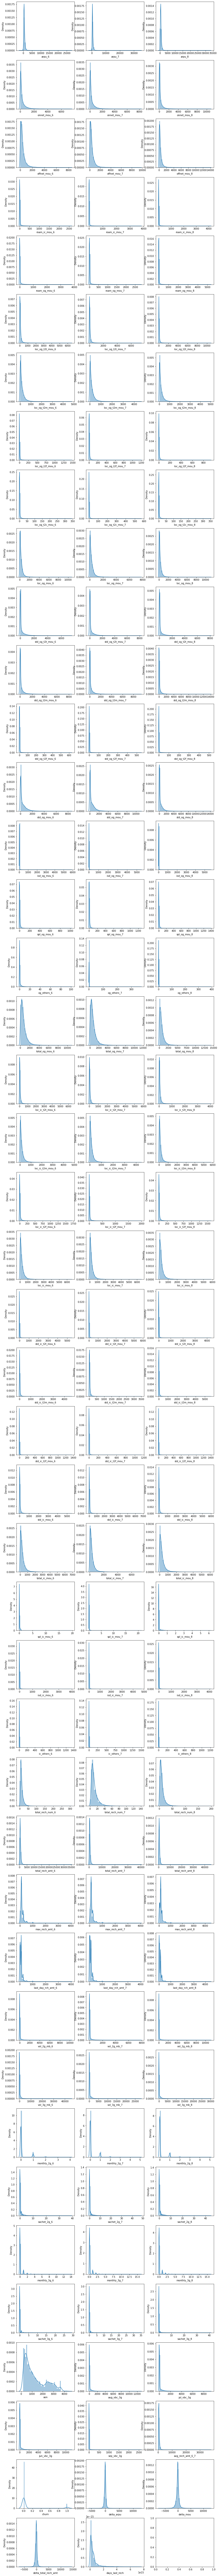

In [41]:
# Plotting distribution plots of numeric variables
fig,ax = plt.subplots(44,3,figsize=[15,200])
for i,x in enumerate(num_vars):
    sns.distplot(df[x],ax=ax[i//3,i%3])
fig.show()

**Insights**
1. The vast majority of features are right skewed and have significant outliers. This indicates that most high-value customers exhibit similar spend and usage behaviour while a few have significantly higher spends and usage.
2. The derived variables 'delta_arpu' and 'delta_mou' are symmetrically distributed around mean 0. This implies that there isn't significant change in the behaviour of most users over time.
3. The derived variable 'delta_total_rech_amt' is also symmetrically distributed, indicating that recharge volume is also stable over time.
4. Lastly, the variable 'days_last_rech' is right-skewed and the larger values are more likely to signify customers who have churned.

#### 3.4.2 Outlier Treatment

We will treat outliers by capping them rather than removing the records so that the predictive models provide additional weight to boundary values.

In [42]:
for x in df.columns.drop('churn'):
    IQR = df[x].quantile(0.75) - df[x].quantile(0.25)
    UV = df[x].quantile(0.75) + 1.5*IQR
    LV = df[x].quantile(0.25) - 1.5*IQR
    df[df[x]>UV][x] = UV
    df[df[x]<LV][x] = LV

#### 3.4.3 Bivariate Analysis

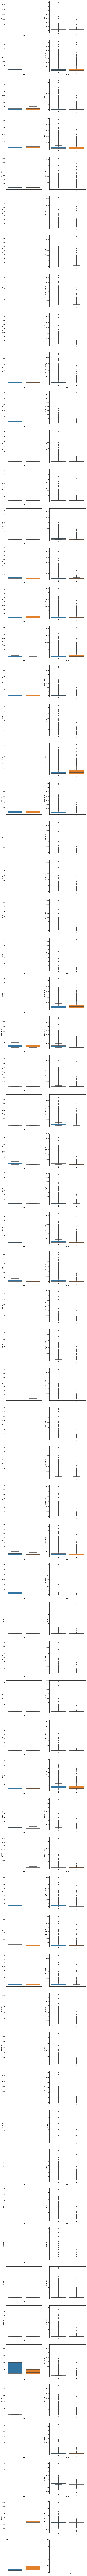

In [43]:
# Plotting box plots of numeric variables against categories
fig,ax = plt.subplots(66,2,figsize=[15,500])
for i,x in enumerate(num_vars):
    sns.boxplot(data=df,x=df['churn'],y=df[x],ax=ax[i//2,i%2])
fig.show()

**Insights**
1. The 'mou' variables, which are measures of minutes of usage mostly have lower values for churned users during the 'action' phase and higher values for active users.
2. The 'total_rech_num', 'total_rech_amt', 'max_rech_amt' and 'last_day_rch_amt' variables, as expected, indicate that chured users made fewer recharges and for lower amounts during the action phase.
3. On aggregate, the AON (age on network) of users who churned was lower than that of users who did not churn.
4. The derived variables 'delta_arpu', 'delta_mou' and 'delta_total_rech_amt' indicate that churned users exhibited a drop in revenue and minutes of usage during the action phase.
5. Lastly, the variable 'days_last_rech' shows that churned users did not recharge for a larger number of days.

#### 3.4.4 Top Correlations

In [44]:
# Printing top correlations excluding the trivial cases of self-correlation
df.corr().unstack()[df.corr().unstack()!=1].sort_values(ascending=False)

total_rech_amt_8  arpu_8              0.953725
arpu_8            total_rech_amt_8    0.953725
isd_og_mou_8      isd_og_mou_7        0.941347
isd_og_mou_7      isd_og_mou_8        0.941347
arpu_6            total_rech_amt_6    0.941256
                                        ...   
delta_mou         std_og_mou_6       -0.326094
total_rech_num_8  days_last_rech     -0.376044
days_last_rech    total_rech_num_8   -0.376044
total_og_mou_6    delta_mou          -0.385020
delta_mou         total_og_mou_6     -0.385020
Length: 17030, dtype: float64

#### 3.4.5 Distribution of the Response Variable

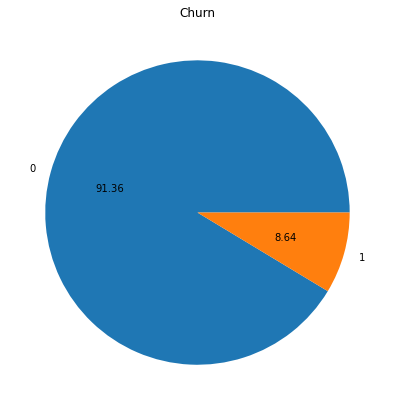

In [45]:
# Plotting a pie chart of the response variable
fig,ax = plt.subplots(figsize=[7,7])
data = df['churn'].value_counts()
labels = data.index
ax.set_title('Churn')
ax.pie(data,labels=labels,autopct='%.2f')
fig.show()

Thus, about 8.64% of high-value customers have churned.

### 3.5 Data Preparation

#### 3.5.1 Training and Testing Datasets

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
df_train,df_test = train_test_split(df,train_size=0.7,stratify=df['churn'],random_state=100)

#### 3.5.2 Scaling Numeric Variables

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
# Deriving the response and predictor variables from the training and test datasets
y_train = df_train.pop('churn')
X_train = df_train

y_test = df_test.pop('churn')
X_test = df_test

In [50]:
# Scaling the numeric variables in the training and test datasets
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),index=X_train.index,columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),index=X_test.index,columns=X_test.columns)

## 4 Prediction

We will use PCA to reduce the number of variables and use 3 classifiers for modelling, namely: the decision tree classifier, the random forest classifier and the XGBoost classifier.

We will use the Recall score for hyperparameter optimisation and model selection because it is more important to identify churners than non-churners. However, it is also important to maintain a high ROC-AUC score to avoid classifying non-churners as churners and rolling out offers to them.

### 4.1 Principal Component Analysis

In [51]:
from sklearn.decomposition import PCA

In [52]:
# Instantiating and fitting PCA 
pca = PCA(random_state=100)
pca.fit(X_train)

PCA(random_state=100)

In [53]:
# Viewing the principal component loadings
pca.components_

array([[-2.49461156e-03, -3.94556402e-03,  2.12229936e-03, ...,
         8.02690461e-03,  4.46845167e-03,  3.31930300e-02],
       [ 5.53339572e-02,  6.11411037e-02,  5.57416423e-02, ...,
        -7.46745987e-03,  3.68811090e-03, -1.11226002e-01],
       [ 3.18415998e-02,  3.43304828e-02,  3.70671163e-02, ...,
         5.00447276e-03,  8.96014611e-03, -4.08419949e-02],
       ...,
       [ 0.00000000e+00,  4.53027872e-15, -8.60753736e-15, ...,
        -6.87449010e-01,  2.69272701e-01, -7.31117805e-17],
       [-2.91686130e-01, -3.09565554e-01,  6.65400189e-01, ...,
         7.36972500e-03,  1.90900205e-02, -7.80625564e-18],
       [-0.00000000e+00, -3.02548402e-16,  1.28388819e-15, ...,
        -2.45894650e-01, -4.14251272e-01,  9.55594031e-17]])

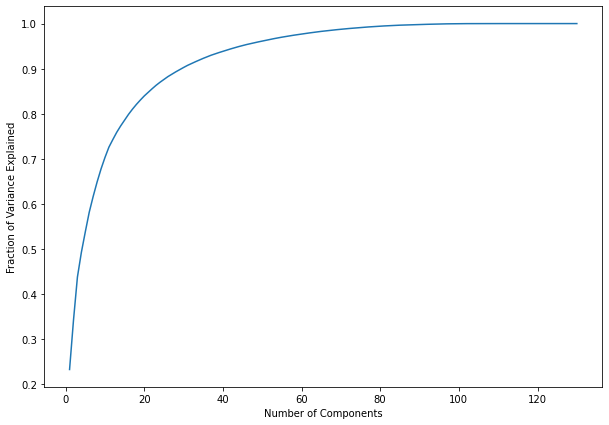

In [54]:
# Plotting the Scree Plot (cumulative variance explained against number of components)
var_cum = np.cumsum(pca.explained_variance_ratio_)
fig,ax = plt.subplots(figsize=[10,7])
ax.plot(range(1,len(var_cum)+1),var_cum)
ax.set_xlabel('Number of Components')
ax.set_ylabel('Fraction of Variance Explained')
fig.show()

In [55]:
# Creating a DataFrame of 'Number of Components' and 'Fraction of Variance Explained'
pc_vars = pd.DataFrame({'Number of Components':range(1,len(var_cum)+1),'Fraction of Variance Explained':var_cum})

In [56]:
# Finding the minimum number of components that explain 95% of the variance
pc_vars[pc_vars['Fraction of Variance Explained']>=0.95].head()

,Number of Components,Fraction of Variance Explained
44,45,0.951312
45,46,0.953481
46,47,0.955516
47,48,0.957496
48,49,0.959367


Thus, the minimum number of components that explain at least 95% of the variance is 45.

In [57]:
# Fitting PCA with 45 components
pca = PCA(n_components=45,random_state=100)

In [58]:
# Deriving PCs of X_train and X_test
X_train_pca = pd.DataFrame(pca.fit_transform(X_train),index=X_train.index,columns=['PC'+str(x) for x in range(1,46)])
X_test_pca = pd.DataFrame(pca.transform(X_test),index=X_test.index,columns=['PC'+str(x) for x in range(1,46)])

In [59]:
# Labelling X_train_pca with the class and plotting a scatter plot
df_train_pca = pd.concat([X_train_pca,y_train],axis=1)
df_train_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,churn
76985,-0.273563,-0.043967,-0.046513,0.243701,-0.068333,0.029917,-0.013998,0.019519,-0.003016,0.056582,-0.018638,0.004724,0.043680,-0.042049,0.071200,0.029908,0.062019,-0.015721,0.174083,-0.041629,0.019153,0.006128,-0.006115,0.004478,0.006925,0.003464,-0.007064,0.025843,0.042223,0.012795,-0.072278,-0.027557,0.029535,0.055970,-0.025305,0.062840,-0.010401,-0.043546,-0.085147,-0.002271,-0.026568,-0.026283,0.074330,0.025323,0.000946,0
77814,-0.273362,0.242091,-0.065867,0.046718,-0.185290,-0.053041,0.014062,0.017116,0.005432,-0.011198,-0.024313,-0.023287,-0.010610,-0.008564,-0.004208,-0.000542,0.021528,0.025564,-0.005687,-0.010426,0.007224,-0.005542,-0.004111,0.002372,-0.002238,0.004945,0.002595,-0.001431,-0.002425,-0.002124,0.002968,-0.003263,0.003883,-0.002514,0.002627,-0.005888,0.005533,-0.019554,0.017480,-0.006613,-0.002393,-0.002204,-0.002147,-0.002031,-0.008833,0
24787,0.143177,-0.073258,0.052114,-0.056980,-0.050415,0.030363,0.018351,-0.024882,0.010024,0.017877,-0.039035,-0.003875,-0.016884,0.012548,0.005062,-0.024126,0.011795,-0.008542,0.009808,0.011721,-0.005036,-0.010071,-0.045840,-0.002707,-0.034442,0.050596,0.052020,-0.002558,0.005345,0.013082,-0.001692,-0.000111,0.005304,-0.008869,-0.022051,0.004145,-0.007669,0.011835,0.007377,0.007460,0.008888,-0.000627,0.004279,-0.005963,0.002755,0
60192,0.005604,-0.154783,-0.136423,-0.022851,0.069557,-0.235389,0.118965,-0.004190,-0.112801,-0.322587,0.245587,0.019725,0.072132,0.242794,0.099153,-0.104346,-0.028998,-0.074915,0.037005,-0.016781,-0.094472,0.323367,-0.367338,0.027568,0.476305,-0.141498,0.182581,-0.000770,-0.027731,-0.005791,0.022227,0.039334,0.006121,-0.048404,-0.013873,0.113077,-0.004114,0.009597,0.068257,-0.029474,0.043549,0.022094,0.022714,0.035238,-0.020419,0
69896,-0.166492,-0.094370,0.121514,-0.070878,-0.004298,-0.012770,-0.003708,-0.003881,-0.018887,0.054109,-0.098497,0.010122,0.043761,0.053663,0.035748,0.152171,-0.066159,-0.015356,-0.012505,0.000887,0.039465,0.022537,-0.002430,-0.011226,0.002318,-0.004447,0.001934,-0.015504,-0.006753,0.010806,0.009766,0.009476,-0.012568,0.018703,-0.007293,-0.002154,-0.021483,-0.018652,0.008071,0.095918,-0.006879,0.109466,0.006110,0.043330,0.009300,0


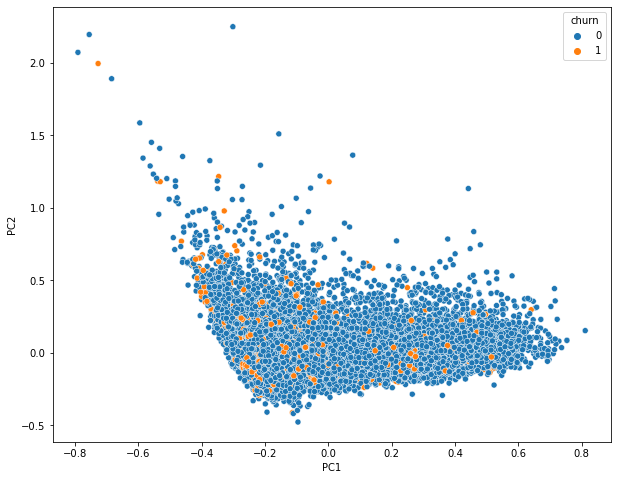

In [60]:
fig,ax = plt.subplots(figsize=[10,8])
sns.scatterplot(df_train_pca['PC1'],df_train_pca['PC2'],hue=df_train_pca['churn'])
fig.show()

The scatter plot of PC2 against PC1 does not show any significant separation of users who churned and did not churn probably because they together explain only a small proportion of the variance.

### 4.2 Decision Tree Classifier

#### 4.2.1 Model Building

##### 4.2.1.1 Building a preliminary tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate

In [62]:
# Fitting the model by addressing class imbalance using the hyperparameter class_weight='balanced'
dt = DecisionTreeClassifier(random_state=100,class_weight='balanced')
dt.fit(X_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=100)

In [63]:
# Printing relevant properties
print("Depth:",dt.get_depth())
print("Number of leaves:",dt.get_n_leaves())

Depth: 75
Number of leaves: 1516


In [64]:
# Calculating cross-validation ROC-AUC and Recall scores
cv_scores_dt = cross_validate(dt,X_train_pca,y_train,scoring=['roc_auc','recall'],n_jobs=-1)

In [65]:
pd.DataFrame(cv_scores_dt).mean()

fit_time        1.240377
score_time      0.012289
test_roc_auc    0.639550
test_recall     0.338292
dtype: float64

The ROC-AUC score of about 0.64 indicates that the preliminary decision tree is a weak learner and the Recall score of 0.34 indicates that a large number of churners are not correctly classified.

##### 4.2.1.2 Building a tree with hyperparameter tuning

In [66]:
params = {'min_samples_split':[10,50,100,200,300],
          'min_samples_leaf':[10,50,100,200,500],
          'max_leaf_nodes':[10,50,100,200,500]}

In [67]:
rscv_dt = RandomizedSearchCV(dt,params,n_iter=10,scoring=['roc_auc','recall'],n_jobs=-1,refit='recall',random_state=100)
rscv_dt.fit(X_train_pca,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_leaf_nodes': [10, 50, 100, 200,
                                                           500],
                                        'min_samples_leaf': [10, 50, 100, 200,
                                                             500],
                                        'min_samples_split': [10, 50, 100, 200,
                                                              300]},
                   random_state=100, refit='recall',
                   scoring=['roc_auc', 'recall'])

In [68]:
# Viewing the results of RandomizedSearchCV
cv_results_dt = pd.DataFrame(rscv_dt.cv_results_)
cv_results_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,0.571631,0.039585,0.011121,0.000338,50,100,10,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.799301,0.784930,0.804905,0.787063,0.780723,0.791384,0.009160,10,0.768595,0.713499,0.732782,0.619835,0.688705,0.704683,0.049813,10
1,1.067410,0.087329,0.011248,0.000426,200,50,500,"{'min_samples_split': 200, 'min_samples_leaf':...",0.838418,0.817317,0.827090,0.802367,0.825009,0.822040,0.011932,3,0.771350,0.741047,0.735537,0.672176,0.774105,0.738843,0.036770,9
2,0.635030,0.036300,0.010936,0.000087,50,500,500,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.818005,0.811194,0.826971,0.803939,0.810718,0.814166,0.007798,7,0.793388,0.774105,0.782369,0.669421,0.707989,0.745455,0.048303,4
3,0.634485,0.031450,0.010819,0.000038,10,500,100,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.818005,0.811194,0.826971,0.803939,0.810718,0.814166,0.007798,7,0.793388,0.774105,0.782369,0.669421,0.707989,0.745455,0.048303,4
4,0.917484,0.032767,0.010980,0.000078,10,100,200,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.833922,0.821337,0.824747,0.824590,0.820877,0.825094,0.004695,1,0.757576,0.746556,0.716253,0.705234,0.790634,0.743251,0.030448,7
5,0.851842,0.074295,0.011744,0.001077,300,10,50,"{'min_samples_split': 300, 'min_samples_leaf':...",0.821194,0.816509,0.828061,0.813881,0.832687,0.822466,0.007023,2,0.752066,0.754821,0.754821,0.749311,0.798898,0.761983,0.018570,1
6,1.088584,0.267500,0.018163,0.005045,200,50,50,"{'min_samples_split': 200, 'min_samples_leaf':...",0.827567,0.820512,0.824176,0.793725,0.833913,0.819979,0.013849,4,0.763085,0.763085,0.730028,0.705234,0.793388,0.750964,0.030408,3
7,1.428894,0.233595,0.018365,0.003834,10,50,500,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.826840,0.810994,0.824475,0.803264,0.825547,0.818224,0.009413,5,0.749311,0.743802,0.754821,0.705234,0.752066,0.741047,0.018273,8
8,0.925838,0.024777,0.012369,0.001899,50,10,50,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.816675,0.816306,0.824472,0.792413,0.828175,0.815608,0.012459,6,0.760331,0.790634,0.730028,0.741047,0.752066,0.754821,0.020615,2
9,0.656089,0.056535,0.010564,0.003223,100,500,100,"{'min_samples_split': 100, 'min_samples_leaf':...",0.818005,0.811194,0.826971,0.803939,0.810718,0.814166,0.007798,7,0.793388,0.774105,0.782369,0.669421,0.707989,0.745455,0.048303,4


In [69]:
rscv_dt.best_params_

{'min_samples_split': 300, 'min_samples_leaf': 10, 'max_leaf_nodes': 50}

In [70]:
rscv_dt.best_score_

0.7619834710743801

Thus, hyperparameter tuning has resulted in a significant increase in ROC-AUC score from about 0.64 to about 0.82 and recall score from 0.34 to 0.76.

#### 4.2.2 Model Evaluation

##### 4.2.2.1 Results

In [71]:
dt = rscv_dt.best_estimator_

In [72]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 50,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 300,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

In [73]:
print("Depth:",dt.get_depth())
print("Number of leaves:",dt.get_n_leaves())

Depth: 10
Number of leaves: 50


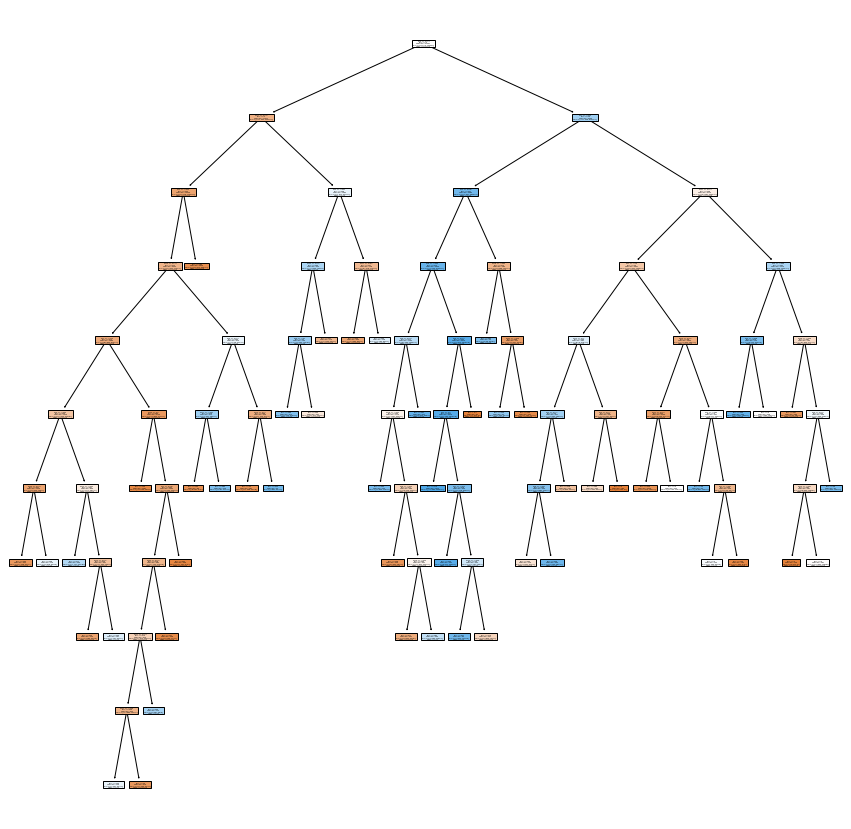

In [74]:
fig,ax = plt.subplots(figsize=[15,15])
plot_tree(dt,feature_names=X_train_pca.columns,class_names=['No Churn','Churn'],filled=True)
fig.show()

##### 4.2.2.2 Performance Metrics

In [75]:
# Importing libraries for scoring models
from sklearn.metrics import accuracy_score, precision_score, recall_score, RocCurveDisplay

In [76]:
# Deriving predicted y-values for the final decision tree model
y_train_pred = dt.predict(X_train_pca)
y_test_pred = dt.predict(X_test_pca)

In [77]:
# Creating a DataFrame with training and test performance metrics
dt_scores = pd.DataFrame({'Metric':['Accuracy','Precision','Recall'],
                          'Training':[accuracy_score(y_train,y_train_pred),precision_score(y_train,y_train_pred),recall_score(y_train,y_train_pred)],
                          'Test':[accuracy_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),recall_score(y_test,y_test_pred)]})

In [78]:
dt_scores

,Metric,Training,Test
0,Accuracy,0.790927,0.767215
1,Precision,0.271259,0.233414
2,Recall,0.841873,0.741645


In [79]:
# Obtaining the ROC-AUC score and Recall score
cv_results_dt.loc[rscv_dt.best_index_,['mean_test_roc_auc','mean_test_recall']]

mean_test_roc_auc    0.822466
mean_test_recall     0.761983
Name: 5, dtype: object

The decision tree model has an ROC-AUC score of 0.82 and Recall score of 0.76. Similar values of accuracy, precision and recall on the training and test datasets indicate that the decision tree model is generalisable. However, the model is not very good because of the low precision.

### 4.3 Random Forest Classifier

#### 4.3.1 Model Building

##### 4.3.1.1 Building a preliminary random forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Fitting the model by addressing class imbalance using the hyperparameter class_weight='balanced'
rf = RandomForestClassifier(n_jobs=-1,random_state=100,class_weight='balanced')
rf.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=100)

In [82]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [83]:
# Calculating cross-validation ROC-AUC score
cv_results_rf = cross_validate(rf,X_train_pca,y_train,scoring=['roc_auc','recall'],n_jobs=-1)

In [84]:
pd.DataFrame(cv_results_rf).mean()

fit_time        10.048683
score_time       0.244016
test_roc_auc     0.886602
test_recall      0.180165
dtype: float64

The ROC-AUC score of about 0.89 indicates that the preliminary random forest has fit the data quite well. However, the model is suboptimal because of the low Recall score of 0.18.

##### 4.3.1.2 Building a random forest model with hyperparameter tuning

In [85]:
params = {'n_estimators': [50,100,200],
          'min_samples_split':[10,50,100,200],
          'min_samples_leaf':[10,50,100,200]
         }

In [86]:
rscv_rf = RandomizedSearchCV(rf,params,n_iter=10,scoring=['roc_auc','recall'],n_jobs=-1,refit='recall',random_state=100)
rscv_rf.fit(X_train_pca,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=100),
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [10, 50, 100, 200],
                                        'min_samples_split': [10, 50, 100, 200],
                                        'n_estimators': [50, 100, 200]},
                   random_state=100, refit='recall',
                   scoring=['roc_auc', 'recall'])

In [87]:
# Viewing the results of RandomizedSearchCV
cv_results_rf = pd.DataFrame(rscv_rf.cv_results_)
cv_results_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,4.959156,0.061276,0.155179,0.056126,50,100,10,"{'n_estimators': 50, 'min_samples_split': 100,...",0.887391,0.893182,0.892690,0.871876,0.904280,0.889884,0.010550,3,0.652893,0.685950,0.691460,0.652893,0.652893,0.667218,0.017631,9
1,7.893835,0.296379,0.300561,0.042630,100,50,100,"{'n_estimators': 100, 'min_samples_split': 50,...",0.887453,0.885973,0.888230,0.878321,0.901671,0.888330,0.007543,6,0.707989,0.732782,0.730028,0.699725,0.732782,0.720661,0.014004,6
2,16.447814,0.364444,0.512102,0.043128,200,100,100,"{'n_estimators': 200, 'min_samples_split': 100...",0.887591,0.887685,0.888631,0.878763,0.903239,0.889182,0.007889,4,0.710744,0.727273,0.746556,0.716253,0.743802,0.728926,0.014325,4
3,15.856069,0.247527,0.503733,0.046595,200,10,100,"{'n_estimators': 200, 'min_samples_split': 10,...",0.887591,0.887685,0.888631,0.878763,0.903239,0.889182,0.007889,4,0.710744,0.727273,0.746556,0.716253,0.743802,0.728926,0.014325,4
4,13.328579,0.207135,0.444064,0.042893,200,50,200,"{'n_estimators': 200, 'min_samples_split': 50,...",0.887148,0.883043,0.883884,0.875461,0.897718,0.885451,0.007231,8,0.735537,0.749311,0.768595,0.732782,0.749311,0.747107,0.012732,1
5,13.359202,0.053735,0.453043,0.031021,200,200,200,"{'n_estimators': 200, 'min_samples_split': 200...",0.887148,0.883043,0.883884,0.875461,0.897718,0.885451,0.007231,8,0.735537,0.749311,0.768595,0.732782,0.749311,0.747107,0.012732,1
6,19.927518,0.292052,0.590757,0.033667,200,50,10,"{'n_estimators': 200, 'min_samples_split': 50,...",0.891191,0.896088,0.894854,0.881516,0.907902,0.894310,0.008504,1,0.586777,0.633609,0.625344,0.581267,0.614325,0.608264,0.020791,10
7,6.736277,0.051354,0.326243,0.014432,100,50,200,"{'n_estimators': 100, 'min_samples_split': 50,...",0.886390,0.880960,0.883275,0.875689,0.895417,0.884346,0.006547,10,0.735537,0.743802,0.760331,0.727273,0.749311,0.743251,0.011345,3
8,4.471209,0.144211,0.245281,0.024373,50,100,50,"{'n_estimators': 50, 'min_samples_split': 100,...",0.888657,0.893998,0.890507,0.877321,0.900915,0.890280,0.007714,2,0.674931,0.732782,0.710744,0.677686,0.707989,0.700826,0.021803,8
9,6.588276,1.628543,0.259317,0.093325,100,100,100,"{'n_estimators': 100, 'min_samples_split': 100...",0.887453,0.885973,0.888230,0.878321,0.901671,0.888330,0.007543,6,0.707989,0.732782,0.730028,0.699725,0.732782,0.720661,0.014004,6


In [88]:
rscv_rf.best_params_

{'n_estimators': 200, 'min_samples_split': 50, 'min_samples_leaf': 200}

In [89]:
rscv_rf.best_score_

0.7471074380165289

Thus, hyperparameter tuning has resulted in virtually no change in the ROC-AUC score of 0.89 but a significant improvement in recall from about 0.18 to about 0.75.

#### 4.3.2 Model Evaluation

##### 4.3.2.1 Results

In [90]:
# Printing the results of the final random forest
rf = rscv_rf.best_estimator_
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 200,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

##### 4.3.2.2 Performance Metrics

In [91]:
# Deriving predicted y-values for the final random forest model
y_train_pred = rf.predict(X_train_pca)
y_test_pred = rf.predict(X_test_pca)

In [92]:
# Creating a DataFrame with training and test performance metrics
rf_scores = pd.DataFrame({'Metric':['Accuracy','Precision','Recall'],
                          'Training':[accuracy_score(y_train,y_train_pred),precision_score(y_train,y_train_pred),recall_score(y_train,y_train_pred)],
                          'Test':[accuracy_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),recall_score(y_test,y_test_pred)]})

In [93]:
rf_scores

,Metric,Training,Test
0,Accuracy,0.867949,0.854731
1,Precision,0.376767,0.341885
2,Recall,0.807713,0.736504


In [94]:
# Obtaining the ROC-AUC score and Recall score
cv_results_rf.loc[rscv_rf.best_index_,['mean_test_roc_auc','mean_test_recall']]

mean_test_roc_auc    0.885451
mean_test_recall     0.747107
Name: 4, dtype: object

The best random forest model has an ROC-AUC score of 0.88 and Recall score of 0.75. It is marginally better than the decision tree model from section 4.2 because it has a higher ROC-AUC score but comparable Recall score. The best randon forest model also has an improved precision score.

### 4.4 XGBoost Classifier

#### 4.4.1 Model Building

##### 4.4.1.1 Building a preliminary XGBoost classifier

In [95]:
from xgboost import XGBClassifier

In [96]:
# Fitting the model by addressing class imbalance using the hyperparameter scale_pos_weight
xgb = XGBClassifier(n_jobs=-1,random_state=100,scale_pos_weight=(len(y_train)-y_train.sum())/y_train.sum(),verbosity=0,silent=True)
xgb.fit(X_train_pca,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10.574104683195593,
              silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=0)

In [97]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 100,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 10.574104683195593,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0,
 'silent': True}

In [98]:
# Calculating cross-validation ROC-AUC and Recall scores
cv_scores_xgb = cross_validate(xgb,X_train_pca,y_train,scoring=['roc_auc','recall'],n_jobs=-1)
cv_scores_xgb

/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with

{'fit_time': array([36.56792021, 36.00559044, 36.85878348, 37.09317279,  8.28587103]),
 'score_time': array([0.08502603, 0.09846783, 0.06853366, 0.06002474, 0.02046299]),
 'test_roc_auc': array([0.88201272, 0.89392397, 0.8947189 , 0.88376852, 0.90681484]),
 'test_recall': array([0.54820937, 0.54545455, 0.51515152, 0.52341598, 0.51515152])}

In [99]:
pd.DataFrame(cv_scores_xgb).mean()

fit_time        30.962268
score_time       0.066503
test_roc_auc     0.892248
test_recall      0.529477
dtype: float64

The ROC-AUC score of about 0.89 of the preliminary XGBoost Classifier is better than the 0.88 of the tuned Random Forest Classifier, but its Recall score of 0.53 is lower than the 0.75 of the latter.

##### 4.4.1.2 Building an XGBoost Classifier model with hyperparameter tuning

In [100]:
params = {'learning_rate': [0.1,0.2,0.3,0.4,0.5],
          'max_depth':[2,4,8,16],
          'min_child_weight':[1,5,10,20]
         }

In [101]:
rscv_xgb = RandomizedSearchCV(xgb,params,n_iter=10,scoring=['roc_auc','recall'],n_jobs=-1,refit='recall',cv=4,random_state=100)
rscv_xgb.fit(X_train_pca,y_train)

/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: Use

/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_labe

/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_labe

/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/allen/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_labe

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimat...
                                           predictor='auto', random_state=100,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=10.574104683195593,
                                           silent=True, subsample=1,
                                           tree_method='exact',
                                           validate_parameters=1, verbosity=0),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5],
                                        'max_depth': [2, 4, 8, 16],
                                        'min_child_weight': [1, 5, 10, 20]},
                   random_state=100, refit='recall',
                   scoring=['roc_auc', 'recall'])

In [102]:
# Viewing the results of RandomizedSearchCV
cv_results_xgb = pd.DataFrame(rscv_xgb.cv_results_)
cv_results_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_learning_rate,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall
0,41.038808,1.508277,0.124280,0.008488,5,8,0.2,"{'min_child_weight': 5, 'max_depth': 8, 'learn...",0.901801,0.897010,0.901444,0.902834,0.900772,0.002231,2,0.508811,0.544053,0.515419,0.492274,0.515139,0.018701,7
1,52.041475,0.848197,0.165830,0.017288,10,16,0.3,"{'min_child_weight': 10, 'max_depth': 16, 'lea...",0.895123,0.898916,0.902876,0.891850,0.897191,0.004126,6,0.469163,0.493392,0.484581,0.432671,0.469952,0.023205,10
2,21.204873,0.734902,0.087779,0.011298,5,4,0.5,"{'min_child_weight': 5, 'max_depth': 4, 'learn...",0.877486,0.882036,0.885128,0.886143,0.882698,0.003368,10,0.588106,0.627753,0.605727,0.589404,0.602747,0.016020,6
3,22.753459,0.654600,0.081232,0.005497,5,4,0.1,"{'min_child_weight': 5, 'max_depth': 4, 'learn...",0.897953,0.902403,0.895365,0.904190,0.899978,0.003500,3,0.779736,0.777533,0.779736,0.763797,0.775200,0.006645,2
4,38.836575,0.312627,0.117171,0.005819,10,8,0.3,"{'min_child_weight': 10, 'max_depth': 8, 'lear...",0.893355,0.895195,0.899019,0.900072,0.896910,0.002740,7,0.484581,0.530837,0.486784,0.509934,0.503034,0.018876,8
5,41.756854,0.668659,0.131207,0.015476,20,8,0.1,"{'min_child_weight': 20, 'max_depth': 8, 'lear...",0.902841,0.902777,0.900770,0.907870,0.903565,0.002621,1,0.649780,0.658590,0.643172,0.637969,0.647378,0.007709,5
6,11.169700,0.156325,0.069888,0.008816,1,2,0.5,"{'min_child_weight': 1, 'max_depth': 2, 'learn...",0.896412,0.902022,0.886385,0.897355,0.895544,0.005698,9,0.781938,0.770925,0.777533,0.783664,0.778515,0.004920,1
7,21.151870,0.041498,0.077550,0.013204,20,4,0.2,"{'min_child_weight': 20, 'max_depth': 4, 'lear...",0.894453,0.904275,0.898663,0.901633,0.899756,0.003649,4,0.733480,0.748899,0.724670,0.730684,0.734433,0.008938,3
8,21.968459,0.643114,0.080105,0.006810,1,4,0.2,"{'min_child_weight': 1, 'max_depth': 4, 'learn...",0.896507,0.905341,0.894625,0.900641,0.899279,0.004121,5,0.731278,0.733480,0.731278,0.737307,0.733336,0.002463,4
9,45.116406,1.699152,0.087020,0.035993,10,16,0.4,"{'min_child_weight': 10, 'max_depth': 16, 'lea...",0.891337,0.894196,0.899246,0.898190,0.895742,0.003165,8,0.466960,0.513216,0.502203,0.483444,0.491456,0.017700,9


In [103]:
rscv_xgb.best_params_

{'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.5}

In [104]:
rscv_xgb.best_score_

0.7785152337330183

Thus, hyperparameter tuning has resulted in a slight increase in ROC-AUC score from about 0.892 to 0.895 and a substantial increase in recall score from 0.53 to about 0.78.

#### 4.4.2 Model Evaluation

##### 4.4.2.1 Results

In [105]:
# Printing the results of the final XGBoost Classifier
xgb = rscv_xgb.best_estimator_
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.5,
 'max_delta_step': 0,
 'max_depth': 2,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 100,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 10.574104683195593,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': 0,
 'silent': True}

##### 4.4.2.2 Performance Metrics

In [106]:
# Deriving predicted y-values for the final XGBoost model
y_train_pred = xgb.predict(X_train_pca)
y_test_pred = xgb.predict(X_test_pca)

In [107]:
# Creating a DataFrame with training and test performance metrics
xgb_scores = pd.DataFrame({'Metric':['Accuracy','Precision','Recall'],
                          'Training':[accuracy_score(y_train,y_train_pred),precision_score(y_train,y_train_pred),recall_score(y_train,y_train_pred)],
                          'Test':[accuracy_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),recall_score(y_test,y_test_pred)]})

In [108]:
xgb_scores

,Metric,Training,Test
0,Accuracy,0.876708,0.854065
1,Precision,0.404013,0.345266
2,Recall,0.898623,0.768638


In [109]:
# Obtaining the ROC-AUC score and Recall Score
cv_results_xgb.loc[rscv_xgb.best_index_,['mean_test_roc_auc','mean_test_recall']]

mean_test_roc_auc    0.895544
mean_test_recall     0.778515
Name: 6, dtype: object

The tuned XGBoost model has an ROC-AUC score of 0.89 and Recall score of 0.78. Similar values of accuracy, precision and recall on the training and test datasets indicate that the model is generalizable.

### 4.5 Model Selection

Summarising performance metrics of the 3 models.

#### 4.5.1 Decision Tree Classifier

In [110]:
# Cross-validation ROC-AUC and Recall Scores
cv_results_dt.loc[rscv_dt.best_index_,['mean_test_roc_auc','mean_test_recall']]

mean_test_roc_auc    0.822466
mean_test_recall     0.761983
Name: 5, dtype: object

In [111]:
# Training and Test Performance metrics
dt_scores

,Metric,Training,Test
0,Accuracy,0.790927,0.767215
1,Precision,0.271259,0.233414
2,Recall,0.841873,0.741645


#### 4.5.2 Random Forest Classifier

In [112]:
# Cross-validation ROC-AUC and Recall Scores
cv_results_rf.loc[rscv_rf.best_index_,['mean_test_roc_auc','mean_test_recall']]

mean_test_roc_auc    0.885451
mean_test_recall     0.747107
Name: 4, dtype: object

In [113]:
# Training and Test Performance metrics
rf_scores

,Metric,Training,Test
0,Accuracy,0.867949,0.854731
1,Precision,0.376767,0.341885
2,Recall,0.807713,0.736504


#### 4.5.3 XGBoost Classifier

In [114]:
# Cross-validation ROC-AUC and Recall Scores
cv_results_xgb.loc[rscv_xgb.best_index_,['mean_test_roc_auc','mean_test_recall']]

mean_test_roc_auc    0.895544
mean_test_recall     0.778515
Name: 6, dtype: object

In [115]:
# Training and Test Performance metrics
xgb_scores

,Metric,Training,Test
0,Accuracy,0.876708,0.854065
1,Precision,0.404013,0.345266
2,Recall,0.898623,0.768638


**We will finalize the XGBoost Classifier for prediction because it has the best cross-validation ROC-AUC and Recall scores of 0.895 and 0.78.**

## 5 Inference

In order to perform inference, we will handle class imbalance by oversampling the minority class and perform logistic regression using relevant predictors.

### 5.1 Oversampling the Minority Class

In [116]:
from sklearn.utils import resample

In [117]:
df_train = pd.concat([X_train,y_train],axis=1)
churn = df_train[df_train['churn']==1]
notchurn = df_train[df_train['churn']==0]
print(churn.shape)
print(notchurn.shape)

(1815, 131)
(19192, 131)


In [118]:
churn = resample(churn,n_samples=len(notchurn),random_state=100)

In [119]:
df_train_ovr = pd.concat([notchurn,churn])
df_train_ovr.shape

(38384, 131)

In [120]:
y_train_ovr = df_train_ovr.pop('churn')
X_train_ovr = df_train_ovr

### 5.2 Using RFECV to Find the Optimal Features for Logistic Regression

In [121]:
# Importing libraries for performing RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [122]:
# Performing RFECV
logm = LogisticRegression(random_state=100,solver='sag',n_jobs=-1)
rfecv_log = RFECV(logm,cv=4,n_jobs=-1)
rfecv_log.fit(X_train_ovr,y_train_ovr)

RFECV(cv=4,
      estimator=LogisticRegression(n_jobs=-1, random_state=100, solver='sag'),
      n_jobs=-1)

In [123]:
# Inspecting results of RFECV
cv_results = pd.DataFrame(rfecv_log.cv_results_)
cv_results

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score
0,0.755966,0.010977,0.770113,0.750938,0.741038,0.761776
1,0.798015,0.005026,0.796999,0.803981,0.800646,0.790434
2,0.807263,0.002924,0.811484,0.806794,0.803251,0.807524
3,0.807706,0.003945,0.813568,0.805857,0.802835,0.808566
4,0.808957,0.003871,0.815548,0.805857,0.806586,0.807837
...,...,...,...,...,...,...
125,0.842408,0.003133,0.845977,0.837953,0.841080,0.844623
126,0.842408,0.003133,0.845977,0.837953,0.841080,0.844623
127,0.842408,0.003133,0.845977,0.837953,0.841080,0.844623
128,0.842408,0.003133,0.845977,0.837953,0.841080,0.844623


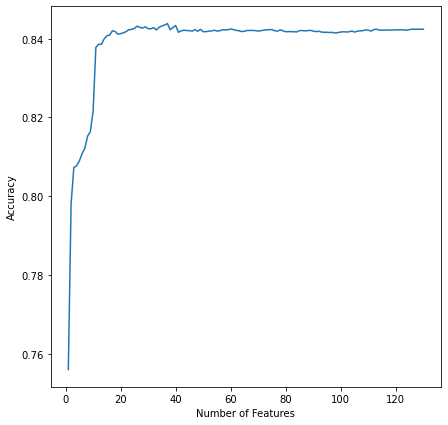

In [124]:
# Plotting classification accuracy against the number of features from RFECV
fig,ax = plt.subplots(figsize=[7,7])
ax.plot(range(1,len(cv_results)+1),cv_results['mean_test_score'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Features')
fig.show()

We will select the top 20 features for the final logistic regression model because the gain in accuracy from adding additional features is very small.

In [125]:
X_train_ovr = X_train_ovr[X_train_ovr.columns[rfecv_log.support_]]

### 5.3 Using RFE to find the top 20 features

In [126]:
from sklearn.feature_selection import RFE

In [127]:
rfe_log = RFE(logm,n_features_to_select=20)
rfe_log.fit(X_train_ovr,y_train_ovr)

RFE(estimator=LogisticRegression(n_jobs=-1, random_state=100, solver='sag'),
    n_features_to_select=20)

In [128]:
X_train_ovr = X_train_ovr[X_train_ovr.columns[rfe_log.support_]]

### 5.4 Multiple Logistic Regression Model with the Top 20 Features

In [129]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
# Fitting the multiple logistic regression model
X_train_sm = sm.add_constant(X_train_ovr)
logm = sm.GLM(y_train_ovr,X_train_sm,family=sm.families.Binomial()).fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38384
Model:                            GLM   Df Residuals:                    38363
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15569.
Date:                Sun, 04 Dec 2022   Deviance:                       31139.
Time:                        12:13:43   Pearson chi2:                 6.35e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4373
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.9091      0.445     13.269      0.000       5.036       6.782
arpu_7                  11.6683      1.348      8.653      0.000       9.025      14.311
roam_og_mou_7            4.0822      0.274     14.891      0.000       3.545       4.619
loc_og_t2t_mou_8       -12.7399      1.783     -7.143      0.000     -16.235      -9.244
loc_og_t2m_mou_6        -6.2003      0.398    -15.560      0.000      -6.981      -5.419
loc_og_t2f_mou_8        -9.4896      1.358     -6.988      0.000     -12.151      -6.828
total_og_mou_8          -8.1161      0.545    -14.889      0.000      -9.184      -7.048
std_ic_t2t_mou_6        11.0071      1.159      9.498      0.000       8.736      13.278
total_ic_mou_8         -22.1697      0.676    -32.781      0.000     -23.495     -20.844
spl_ic_mou_8            -4.6133      0.289    -15.978      0.000      -5.179      -4.047
isd_ic_mou_7             9.2819      1.307      7.101      0.000       6.720      11.844
last_day_rch_amt_8     -17.8158      0.787    -22.644      0.000     -19.358     -16.274
monthly_2g_8            -6.9015      0.363    -19.004      0.000      -7.613      -6.190
sachet_2g_8             -6.9118      0.520    -13.295      0.000      -7.931      -5.893
monthly_3g_8           -12.5008      0.755    -16.563      0.000     -13.980     -11.021
sep_vbc_3g             -24.7326      2.876     -8.599      0.000     -30.370     -19.096
avg_rech_amt_6_7         5.7379      1.488      3.857      0.000       2.822       8.654
delta_arpu              -0.0935      1.747     -0.054      0.957      -3.518       3.331
delta_mou              -16.3905      0.771    -21.248      0.000     -17.902     -14.879
delta_total_rech_amt    -2.6846      1.784     -1.505      0.132      -6.182       0.812
days_last_rech           6.2094      0.196     31.760      0.000       5.826       6.593
========================================================================================
"""

In [131]:
# Defining a function to calculate variance inflation factor
def vif(X_train_sm):
    vif = [variance_inflation_factor(X_train_sm,i) for i in range(1,len(X_train_sm.columns))]
    VIF = pd.DataFrame({'Variable':X_train_sm.columns[1:],'VIF':vif})
    print(VIF.sort_values(by='VIF',ascending=False))

In [132]:
vif(X_train_sm)

                Variable       VIF
18  delta_total_rech_amt  7.384050
16            delta_arpu  6.149693
15      avg_rech_amt_6_7  5.060737
0                 arpu_7  3.512346
5         total_og_mou_8  2.296228
17             delta_mou  2.236727
7         total_ic_mou_8  1.518488
10    last_day_rch_amt_8  1.438284
3       loc_og_t2m_mou_6  1.247515
19        days_last_rech  1.226438
2       loc_og_t2t_mou_8  1.208060
13          monthly_3g_8  1.182449
9           isd_ic_mou_7  1.133407
1          roam_og_mou_7  1.123411
4       loc_og_t2f_mou_8  1.103407
6       std_ic_t2t_mou_6  1.083981
11          monthly_2g_8  1.054881
12           sachet_2g_8  1.047485
14            sep_vbc_3g  1.045331
8           spl_ic_mou_8  1.023265


### 5.5 Multiple Logistic Regression after dropping delta_arpu, which has a p-value greater than 0.05

In [133]:
X_train_ovr = X_train_ovr.drop(columns=['delta_arpu'])

In [134]:
X_train_sm = sm.add_constant(X_train_ovr)
logm = sm.GLM(y_train_ovr,X_train_sm,family=sm.families.Binomial()).fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38384
Model:                            GLM   Df Residuals:                    38364
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15569.
Date:                Sun, 04 Dec 2022   Deviance:                       31139.
Time:                        12:13:44   Pearson chi2:                 6.35e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4373
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.9032      0.431     13.686      0.000       5.058       6.749
arpu_7                  11.6874      1.300      8.989      0.000       9.139      14.236
roam_og_mou_7            4.0826      0.274     14.899      0.000       3.546       4.620
loc_og_t2t_mou_8       -12.7418      1.783     -7.146      0.000     -16.237      -9.247
loc_og_t2m_mou_6        -6.1993      0.398    -15.578      0.000      -6.979      -5.419
loc_og_t2f_mou_8        -9.4959      1.353     -7.018      0.000     -12.148      -6.844
total_og_mou_8          -8.1179      0.544    -14.922      0.000      -9.184      -7.052
std_ic_t2t_mou_6        11.0077      1.159      9.499      0.000       8.736      13.279
total_ic_mou_8         -22.1715      0.676    -32.822      0.000     -23.495     -20.847
spl_ic_mou_8            -4.6130      0.289    -15.979      0.000      -5.179      -4.047
isd_ic_mou_7             9.2806      1.307      7.100      0.000       6.719      11.843
last_day_rch_amt_8     -17.8157      0.787    -22.643      0.000     -19.358     -16.274
monthly_2g_8            -6.9015      0.363    -19.004      0.000      -7.613      -6.190
sachet_2g_8             -6.9120      0.520    -13.295      0.000      -7.931      -5.893
monthly_3g_8           -12.5006      0.755    -16.564      0.000     -13.980     -11.021
sep_vbc_3g             -24.7344      2.876     -8.600      0.000     -30.371     -19.098
avg_rech_amt_6_7         5.7184      1.442      3.966      0.000       2.892       8.545
delta_mou              -16.4032      0.734    -22.354      0.000     -17.841     -14.965
delta_total_rech_amt    -2.7485      1.328     -2.070      0.038      -5.350      -0.147
days_last_rech           6.2093      0.195     31.762      0.000       5.826       6.592
========================================================================================
"""

In [135]:
vif(X_train_sm)

                Variable       VIF
15      avg_rech_amt_6_7  5.022295
0                 arpu_7  3.456759
17  delta_total_rech_amt  3.275552
5         total_og_mou_8  2.287969
16             delta_mou  2.129093
7         total_ic_mou_8  1.518485
10    last_day_rch_amt_8  1.430699
3       loc_og_t2m_mou_6  1.246816
18        days_last_rech  1.218571
2       loc_og_t2t_mou_8  1.207920
13          monthly_3g_8  1.180428
9           isd_ic_mou_7  1.131801
1          roam_og_mou_7  1.123350
4       loc_og_t2f_mou_8  1.097412
6       std_ic_t2t_mou_6  1.083889
11          monthly_2g_8  1.054880
12           sachet_2g_8  1.047453
14            sep_vbc_3g  1.044567
8           spl_ic_mou_8  1.022916


### 5.6 Multiple Logistic Regression after dropping avg_rech_amt_6_7, which has a VIF greater than 5

In [136]:
X_train_ovr = X_train_ovr.drop(columns=['avg_rech_amt_6_7'])

In [137]:
X_train_sm = sm.add_constant(X_train_ovr)
logm = sm.GLM(y_train_ovr,X_train_sm,family=sm.families.Binomial()).fit()
logm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38384
Model:                            GLM   Df Residuals:                    38365
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15577.
Date:                Sun, 04 Dec 2022   Deviance:                       31154.
Time:                        12:13:45   Pearson chi2:                 6.20e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4371
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.3490      0.409     15.534      0.000       5.548       7.150
arpu_7                  15.1742      0.926     16.381      0.000      13.359      16.990
roam_og_mou_7            4.2543      0.271     15.714      0.000       3.724       4.785
loc_og_t2t_mou_8       -12.8185      1.775     -7.220      0.000     -16.298      -9.339
loc_og_t2m_mou_6        -5.9803      0.394    -15.192      0.000      -6.752      -5.209
loc_og_t2f_mou_8        -9.5999      1.354     -7.092      0.000     -12.253      -6.947
total_og_mou_8          -7.4212      0.511    -14.536      0.000      -8.422      -6.421
std_ic_t2t_mou_6        11.2942      1.154      9.787      0.000       9.033      13.556
total_ic_mou_8         -22.1657      0.675    -32.842      0.000     -23.489     -20.843
spl_ic_mou_8            -4.6083      0.288    -15.990      0.000      -5.173      -4.043
isd_ic_mou_7             9.4249      1.306      7.217      0.000       6.865      11.985
last_day_rch_amt_8     -17.0569      0.767    -22.251      0.000     -18.559     -15.554
monthly_2g_8            -6.8653      0.363    -18.889      0.000      -7.578      -6.153
sachet_2g_8             -6.8497      0.520    -13.170      0.000      -7.869      -5.830
monthly_3g_8           -11.9872      0.740    -16.197      0.000     -13.438     -10.537
sep_vbc_3g             -24.2023      2.847     -8.501      0.000     -29.783     -18.622
delta_mou              -16.5956      0.730    -22.729      0.000     -18.027     -15.165
delta_total_rech_amt    -5.2875      1.152     -4.591      0.000      -7.545      -3.030
days_last_rech           6.1423      0.194     31.717      0.000       5.763       6.522
========================================================================================
"""

In [138]:
vif(X_train_sm)

                Variable       VIF
16  delta_total_rech_amt  2.247412
15             delta_mou  2.121020
5         total_og_mou_8  2.019077
0                 arpu_7  1.762843
7         total_ic_mou_8  1.515761
10    last_day_rch_amt_8  1.305284
3       loc_og_t2m_mou_6  1.229477
17        days_last_rech  1.218425
2       loc_og_t2t_mou_8  1.206393
13          monthly_3g_8  1.138333
9           isd_ic_mou_7  1.130564
4       loc_og_t2f_mou_8  1.097282
1          roam_og_mou_7  1.097185
6       std_ic_t2t_mou_6  1.080137
11          monthly_2g_8  1.051391
12           sachet_2g_8  1.044427
14            sep_vbc_3g  1.039995
8           spl_ic_mou_8  1.022824


### 5.7 Optimal Probability Threshold

In [139]:
from sklearn.metrics import confusion_matrix

In [140]:
# Calculating accuracy, sensitivity, specificity, precision and recall for different thresholds
thresholds = np.arange(0,1,0.1)
accuracy = np.array([])
sensitivity = np.array([])
specificity = np.array([])
precision = np.array([])

for t in thresholds:
    y_train_pred = logm.predict(X_train_sm).map(lambda x: 1 if x>t else 0)
    cm = confusion_matrix(y_train_ovr,y_train_pred)
    accuracy = np.append(accuracy,(cm[0,0]+cm[1,1])/np.sum(cm))
    sensitivity = np.append(sensitivity,cm[1,1]/np.sum(cm[1,]))
    specificity = np.append(specificity,cm[0,0]/np.sum(cm[0,]))
    precision = np.append(precision,cm[1,1]/(cm[0,1]+cm[1,1]))
    
thresholds_df = pd.DataFrame({'Threshold':thresholds,'Accuracy':accuracy,'Sensitivity':sensitivity,'Specificity':specificity,'Precision':precision,'Recall':sensitivity})
thresholds_df

,Threshold,Accuracy,Sensitivity,Specificity,Precision,Recall
0,0.0,0.500000,1.000000,0.000000,0.500000,1.000000
1,0.1,0.668091,0.971082,0.365100,0.604665,0.971082
2,0.2,0.739318,0.948416,0.530221,0.668749,0.948416
3,0.3,0.786864,0.918039,0.655690,0.727246,0.918039
4,0.4,0.821358,0.885994,0.756722,0.784571,0.885994
5,0.5,0.842773,0.849260,0.836286,0.838383,0.849260
6,0.6,0.847306,0.803929,0.890684,0.880299,0.803929
7,0.7,0.817242,0.709150,0.925333,0.904740,0.709150
8,0.8,0.745675,0.535536,0.955815,0.923782,0.535536
9,0.9,0.640006,0.300698,0.979314,0.935636,0.300698


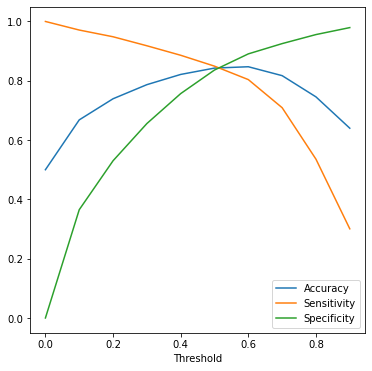

In [141]:
# Plotting the accuracy, sensitivity and specificity
fig,ax = plt.subplots(figsize=[6,6])
thresholds_df.plot('Threshold',['Accuracy','Sensitivity','Specificity'],ax=ax)
fig.show()

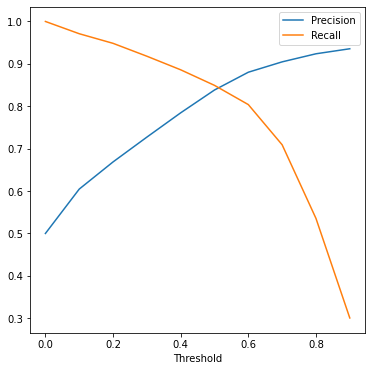

In [142]:
# Plotting the precision and recall
fig,ax = plt.subplots(figsize=[6,6])
thresholds_df.plot('Threshold',['Precision','Recall'],ax=ax)
fig.show()

According to the precision-recall view, which is applicable to the current problem, the optimal probability threshold is about 0.5.

### 5.8 Model Evaluation

In [143]:
# Preparing response and predictor variables for testing
y_train_pred_probs = logm.predict(sm.add_constant(X_train[X_train_ovr.columns]))
y_train_pred = y_train_pred_probs.map(lambda x: 1 if x > 0.5 else 0)

X_test = X_test[X_train_ovr.columns]

In [144]:
# Making predictions on the test set based on the final model
y_test_pred_probs = logm.predict(sm.add_constant(X_test))
y_test_pred = y_test_pred_probs.map(lambda x: 1 if x > 0.5 else 0)

In [145]:
# Creating a DataFrame with training and test performance metrics
logm_scores = pd.DataFrame({'Metric':['Accuracy','Precision','Recall'],
                          'Training':[accuracy_score(y_train,y_train_pred),precision_score(y_train,y_train_pred),recall_score(y_train,y_train_pred)],
                          'Test':[accuracy_score(y_test,y_test_pred),precision_score(y_test,y_test_pred),recall_score(y_test,y_test_pred)]})

In [146]:
logm_scores

,Metric,Training,Test
0,Accuracy,0.837102,0.832408
1,Precision,0.328202,0.319862
2,Recall,0.845730,0.834190


Similar values of accuracy, precision and recall on the training and test datasets show that the logistic regression model is generalisable.

### 5.9 Model Interpretation

#### 5.9.1 Equation of logistic regression with normalised variables

logit(p) = 6.349 + 15.1742\*arpu_7 + 4.2543\*roam_og_mou_7 - 12.8185\*loc_og_t2t_mou_8 - 5.9803\*loc_og_t2m_mou_6 - 9.5999\*loc_og_t2f_mou_8 - 7.4212\*total_og_mou_8 + 11.2942\*std_ic_t2t_mou_6 - 22.1657\*total_ic_mou_8 - 4.6083\*spl_ic_mou_8 + 9.4249\*isd_ic_mou_7 - 17.0569\*last_day_rch_amt_8 - 6.8653\*monthly_2g_8 - 6.8497\*sachet_2g_8 - 11.9872\*monthly_3g_8 - 24.2023\*sep_vbc_3g - 16.5956\*delta_mou - 5.2875\*delta_total_rech_amt + 6.1423\*days_last_rech

#### 5.9.2 Interpretation of results

In [147]:
# Sorting predictor variables in the descending order of the absolute value of their model coefficients
sorted(logm.params.index,key=lambda x: abs(logm.params[x]),reverse=True)

['sep_vbc_3g',
 'total_ic_mou_8',
 'last_day_rch_amt_8',
 'delta_mou',
 'arpu_7',
 'loc_og_t2t_mou_8',
 'monthly_3g_8',
 'std_ic_t2t_mou_6',
 'loc_og_t2f_mou_8',
 'isd_ic_mou_7',
 'total_og_mou_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'const',
 'days_last_rech',
 'loc_og_t2m_mou_6',
 'delta_total_rech_amt',
 'spl_ic_mou_8',
 'roam_og_mou_7']

As per the final model, the top 3 variables that predict churn are as follows:
1. sep_vbc_3g - when the normalised volume based cost of 3G increases by 1, the log odds of churn decreases by 24.2023
2. total_ic_mou_8 - when the normalised total incoming minutes of usage during the action phase (month 8) increases by 1, the log odds of churn decreases by 22.1657
3. last_day_rch_amt_8 - when normalised last_day_rch_amt of the action phase (month 8) increases by 1, the log odds of churn decreases by 17.0569.

## 6 Strategies to Manage Churn

Based on this analysis, we can recommend the following strategies to manage churn:
1. Deploy the predictive model to identify customers who are likely to churn and provide customised offers and improved customer experiences to retain them.
2. The 0.785 recall value of the final XGBoost model indicates that it identifies almost 80% of churners but its low precision indicates a large number of false positives. So it's important to ensure that the identified customers are actually likely churners, by adopting additional measures such as asking qualifying questions. This is to avoid rolling out offers to users who are not likely to churn.
3. As per the EDA conducted in section 3.4, the minutes of usage of users who went on to churn decreased during the action phase. So the special offers given to them can be in the form of free calling minutes.
4. Furthermore, discounts can be given on larger recharge amounts because users who went on to churn tended to make lower recharges during the action phase.
5. Users who went on to churn also did not make recharges for a large number of days and one option to retain them is to give complementary recharges.
6. As per the logistic regression model of section 5, users who spent a lot on 3G services were less likely to churn. Special 3G offers can be rolled out to users who are predicted to churn to capitalise on this behaviour.